In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [11]:
plt.style.use('ggplot')

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

# Importing the data

In [2]:
!curl -o historical_automobile_sales.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 28 54244   28 15563    0     0   6277      0  0:00:08  0:00:02  0:00:06  6280
 58 54244   58 31494    0     0   8107      0  0:00:06  0:00:03  0:00:03  8110
 90 54244   90 49152    0     0  10962      0  0:00:04  0:00:04 --:--:-- 10966
100 54244  100 54244    0     0  11558      0  0:00:04  0:00:04 --:--:-- 12492


In [3]:
df = pd.read_csv('historical_automobile_sales.csv')
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.shape

(528, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,528.0,2001.500000,12.710467,1980.000000,1990.750000,2001.500000,2012.250000,2023.000000
Recession,528.0,0.214015,0.410526,0.000000,0.000000,0.000000,0.000000,1.000000
Consumer_Confidence,528.0,101.140170,10.601154,73.900000,94.035000,100.740000,108.240000,131.670000
Seasonality_Weight,528.0,0.575795,0.454477,0.000000,0.250000,0.500000,0.750000,1.500000
Price,528.0,24964.991956,4888.073433,8793.663000,21453.300500,25038.691500,28131.684750,44263.657000
Advertising_Expenditure,528.0,3067.456439,1139.564637,1009.000000,2083.500000,3072.000000,4067.250000,4983.000000
Competition,528.0,6.064394,1.968350,3.000000,4.000000,6.000000,8.000000,9.000000
GDP,528.0,40.073903,16.249714,12.508000,27.237500,39.214500,53.506500,70.374000
Growth_Rate,528.0,-0.242001,0.861268,-4.227601,-0.574049,-0.013162,0.388932,0.815074
unemployment_rate,528.0,2.453977,1.119019,1.000000,1.600000,2.300000,2.900000,6.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year

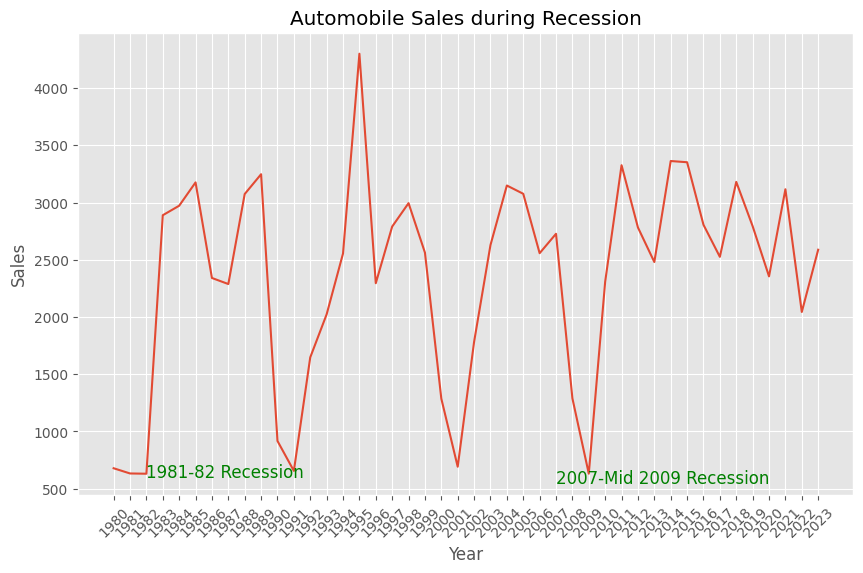

In [25]:
plt.figure(figsize=(10, 6))
df.groupby("Year")["Automobile_Sales"].mean().plot()
plt.title("Automobile Sales during Recession")
plt.ylabel("Sales")
plt.xticks(df["Year"].unique(), rotation=45)
plt.text(1982, 600, "1981-82 Recession", fontsize=12, color="green")
plt.text(2007, 550, "2007-Mid 2009 Recession", fontsize=12, color="green")
plt.show()